In [1]:
import numpy as np
import scipy
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
import os
from utils import get_sample_freq, get_test_freq, get_stimulus, remove_outliers
from scipy.stats import ttest_ind, levene

mode = 'Frequency'

stimulus_raw = scipy.io.loadmat('dat_stimulus.mat')
spk_sample_raw = scipy.io.loadmat('dat_spk_sample.mat')
spk_test_raw = scipy.io.loadmat('dat_spk_test.mat')

stimulus = stimulus_raw['stimulus']
spk_sample = spk_sample_raw['spk_sample']
spk_test = spk_test_raw['spk_test']

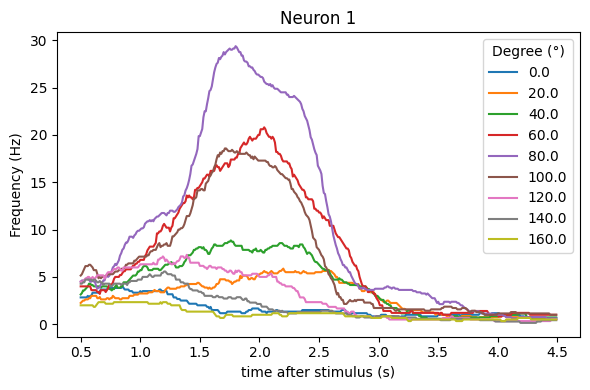

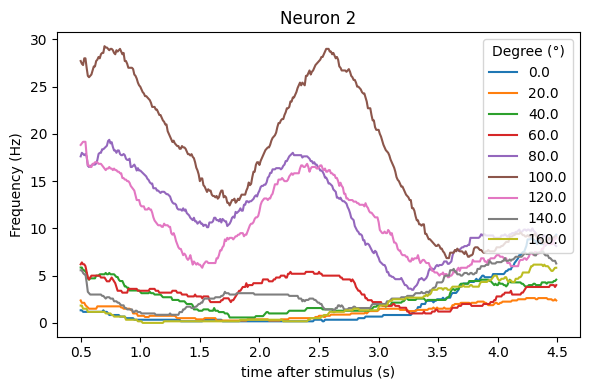

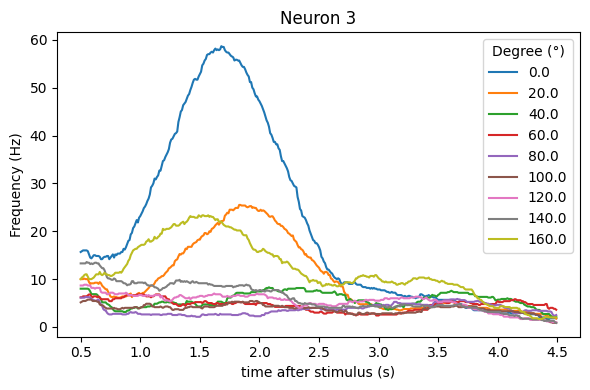

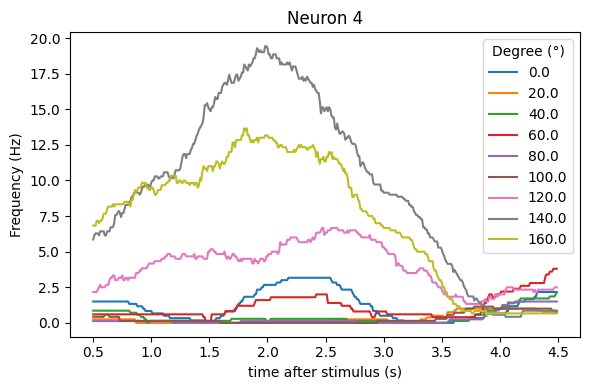

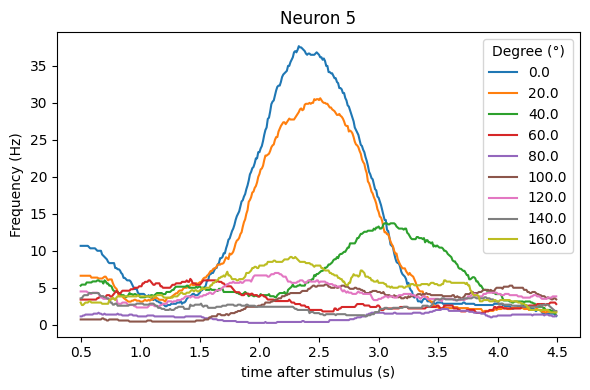

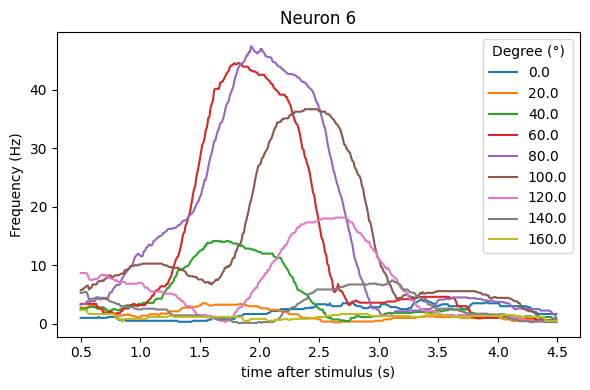

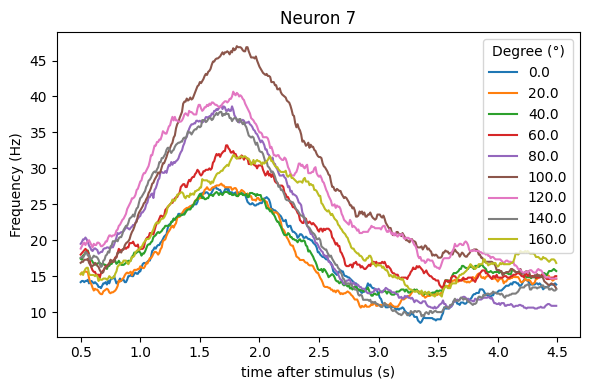

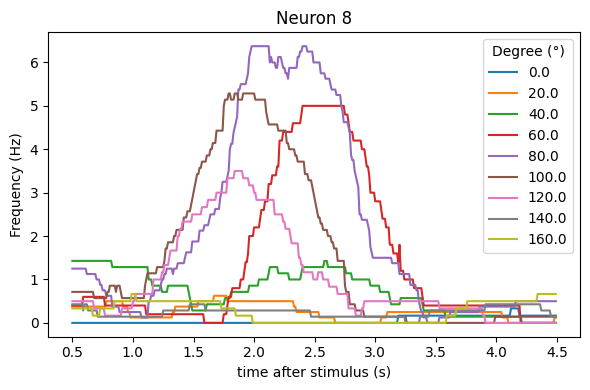

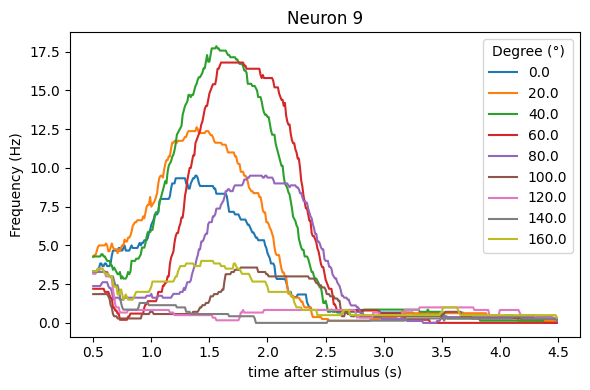

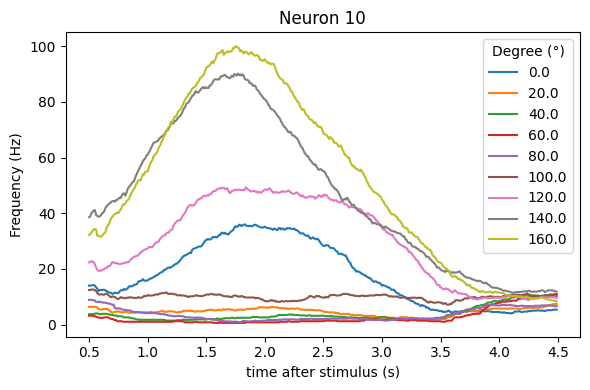

In [36]:
degrees = np.unique(stimulus[:,1])
type = 'Neuron'
for num in np.arange(1,11):
    if type == 'Neuron':
        sample = spk_sample[num-1,0]
        start, end = 50, 350
    elif type == 'Case':
        sample = spk_test[num-1,0]
        start, end = 400, 700
    
    plt.figure(figsize = (6, 4), dpi = 100)
    for degree in degrees:
        stim_time_list = stimulus[:,0][stimulus[:,1] == degree]
        stim_time_list = stim_time_list[(stim_time_list >= start) & (stim_time_list < end)]
        Freq_list = np.zeros_like(np.arange(0,4,0.01))
        for time in stim_time_list:
            freq_list = []
            for window_start in np.arange(0,4,0.01):
                freq = len(sample[(sample >= (time + window_start)) & (sample < (time + window_start + 1))])
                freq_list.append(freq)
            Freq_list += np.array(freq_list)
        Freq_list /= len(stim_time_list)
        plt.plot(np.arange(0,4,0.01) + 0.5, Freq_list, label = degree)
    plt.legend(title='Degree (°)')
    plt.title(f'{type} {num}')
    plt.xlabel('time after stimulus (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.savefig(f'./Figures/{type}{num}.png')